<a href="https://colab.research.google.com/github/TAEWOOYOON/SkillTreePython-DeepLearning/blob/main/03.NLP-with-tensorflow2.0/ch03_03_NLP%EA%B8%B0%EC%B4%88_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.03 NLP기초 - 순환 신경망
---

* 날짜: 2022.07.15
* 이름: 윤태우


## 학습내용
    - 순환 신경망에 대해 이해한다.
    - RNN
    - GRU
    - LSTM

```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [ ]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 714, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 714 (delta 176), reused 255 (delta 155), pack-reused 427
Receiving objects: 100% (714/714), 38.09 MiB | 16.80 MiB/s, done.
Resolving deltas: 100% (369/369), done.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *
```

In [ ]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *

## imdb 베이스 모델
---

### **| imdb 데이터 처리**
```
MAX_LEN = 256
MAX_FEATURES = 10000

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
x_train = preprocessing.sequence.pad_sequences(x_train,
                                               padding='post',
                                               maxlen=MAX_LEN)

x_test = preprocessing.sequence.pad_sequences(x_test,
                                              padding='post',
                                              maxlen=MAX_LEN)
print(x_train.shape, x_test.shape)
```

In [ ]:
MAX_LEN = 256
MAX_FEATURES = 10000

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
x_train = preprocessing.sequence.pad_sequences(x_train,
                                               padding='post',
                                               maxlen=MAX_LEN)

x_test = preprocessing.sequence.pad_sequences(x_test,
                                              padding='post',
                                              maxlen=MAX_LEN)
print(x_train.shape, x_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000, 256) (25000, 256)


### **| FCN with GlobalAveragePooling1D**

Model: "FCNwithGAP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding (Embedding)       (None, 256, 32)           320000    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 5s 6ms/step - loss: 0.6809 - acc: 0.7054 - val_loss: 0.6643 - 

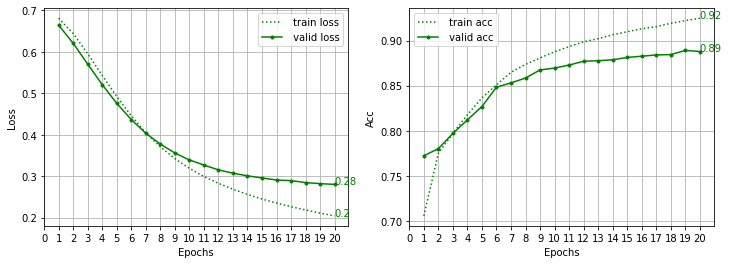

In [ ]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.GlobalAveragePooling1D()(y)
y = layers.Dense(1, activation = 'sigmoid')(y)
model = models.Model(x,y, name='FCNwithGAP')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_split = 0.2)
plot_lcurve([history], [''], ['g'])

## RNN
---

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image6_f6vds6.png width=800>
</p>

Model: "FCNwithGAP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 256, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 37s 226ms/step - loss: 0.6919 - acc: 0.5073 - val_loss: 0.6875 - val_acc: 0.5200
Epoch 2/5
157/157 [=============================

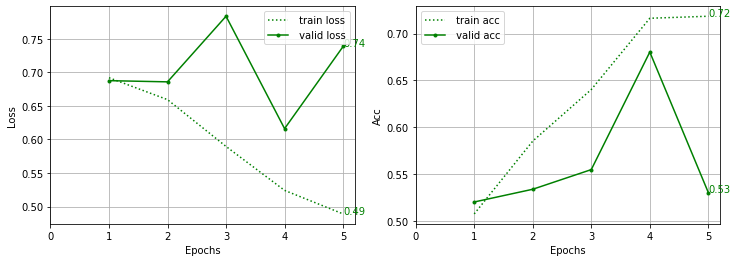

In [ ]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.SimpleRNN(32)(y)
y = layers.Dense(1, activation = 'sigmoid')(y)
model = models.Model(x,y, name='RNN')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 5,
                    batch_size = 128,
                    validation_split = 0.2)
plot_lcurve([history], [''], ['g'])

## LSTM
---

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image3_nsnxp3.png width=600>
</p>



Model: "FCNwithGAP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 256, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 4s 17ms/step - loss: 0.6740 - acc: 0.5719 - val_loss: 0.6095 - val_acc: 0.6956
Epoch 2/20
157/157 [=============================

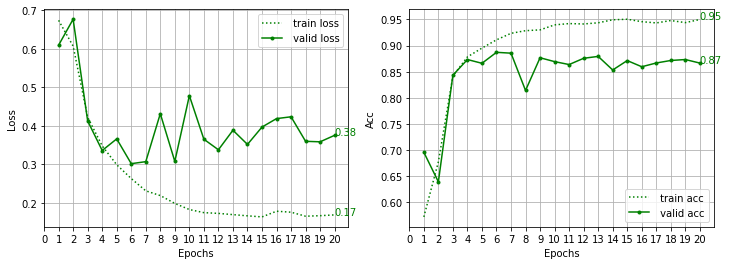

In [ ]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.LSTM(32)(y)
y = layers.Dense(1, activation = 'sigmoid')(y)
model = models.Model(x,y, name='LSTM')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_split = 0.2)
plot_lcurve([history], [''], ['g'])

### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>


Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 256, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 256, 32)           8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 8s

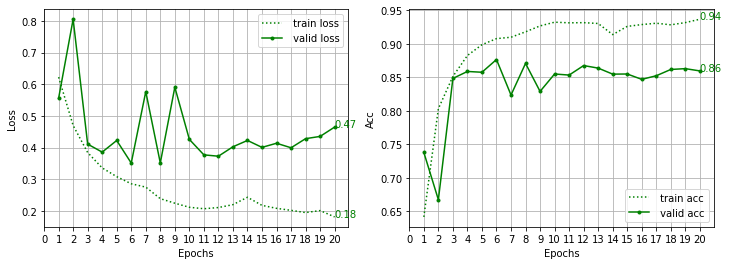

In [ ]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.LSTM(32, return_sequences = True)(y) # 2차 텐서가 출력된다.
y = layers.LSTM(32, return_sequences = False)(y) # 1차 텐서가 출력된다.
y = layers.Dense(1, activation = 'sigmoid')(y)
model = models.Model(x,y, name='LSTM')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_split = 0.2)
plot_lcurve([history], [''], ['g'])

## GRU
---


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image10_zgefie.png width=600>
</p>



Model: "GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 256, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 4s 17ms/step - loss: 0.6921 - acc: 0.5192 - val_loss: 0.6689 - val_acc: 0.5674
Epoch 2/20
157/157 [==============================] - 2s

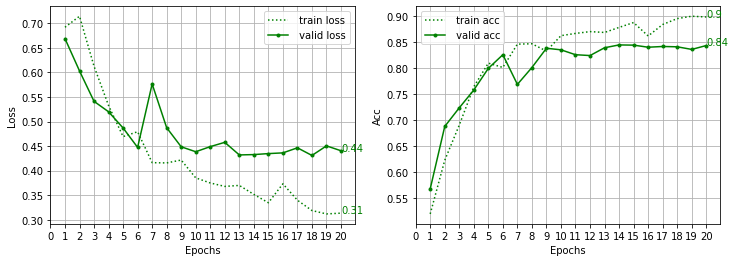

In [ ]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.GRU(32)(y)
y = layers.Dense(1, activation = 'sigmoid')(y)
model = models.Model(x,y, name='GRU')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_split = 0.2)
plot_lcurve([history], [''], ['g'])

### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>


Model: "GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 256, 32)           320000    
                                                                 
 gru_1 (GRU)                 (None, 256, 32)           6336      
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 332,705
Trainable params: 332,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 7s 

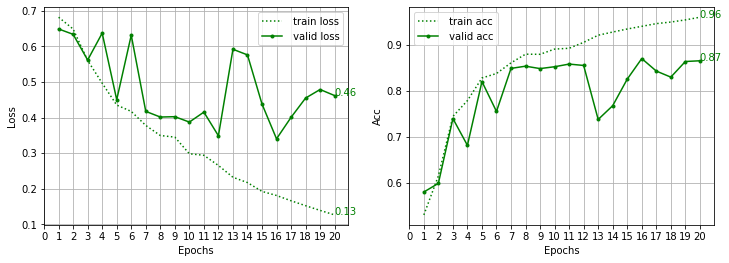

In [ ]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.GRU(32, return_sequences = True)(y)
y = layers.GRU(32, return_sequences = False)(y)
y = layers.Dense(1, activation = 'sigmoid')(y)
model = models.Model(x,y, name='GRU')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_split = 0.2)
plot_lcurve([history], [''], ['g'])